In [1]:
#Import key libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [2]:
### Let's  Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn import metrics

In [3]:
train_df = pd.read_csv('train_modified.csv',index_col='PassengerId')

In [4]:
list_of_features = list(set(train_df.columns) - set(['Survived','Embarked_Q','Cabintype_1.0','Cabintype_2.0','Age']))
target = 'Survived'

In [5]:
X = train_df[list_of_features]
y= train_df[target]

# Grid Search CV ( Logistic)

In [29]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
regr = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=5)

In [30]:
#Now Predict

regr.fit(X,y)
y_pred = regr.predict(X)
y_pred_proba = regr.predict_proba(X)[:,1]

In [31]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y, regr.predict_proba(X)[:,1])
print("ROC-AUC-Score:", r_a_score)

('ROC-AUC-Score:', 0.8711195792185488)


('Accuracy Score: ', 0.8277027027027027)
('Probablity of prediction to be 1 or Yes: ', 6.0)



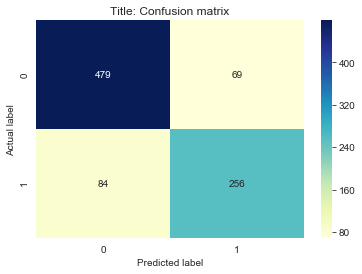

In [32]:
sns.heatmap(pd.DataFrame(confusion_matrix(y,y_pred)), 
            annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Title: Confusion matrix')

print('Accuracy Score: ', metrics.accuracy_score(y, y_pred))

from sklearn.metrics import log_loss
print("Probablity of prediction to be 1 or Yes: ", round(log_loss(y, y_pred)))
print("")

In [33]:
print(classification_report(y,y_pred))

from sklearn.metrics import f1_score
f1_score(y, y_pred, average='weighted') 

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       548
         1.0       0.79      0.75      0.77       340

   micro avg       0.83      0.83      0.83       888
   macro avg       0.82      0.81      0.82       888
weighted avg       0.83      0.83      0.83       888



0.826922623170669

In [34]:
print('Accuracy Score: ', metrics.accuracy_score(y, y_pred))

('Accuracy Score: ', 0.8277027027027027)


In [12]:
test_df = pd.read_csv('test_modified.csv',index_col='PassengerId')
X_test = test_df[list_of_features]

In [13]:
y_pred_test = regr.predict(X_test)

In [14]:
test_df['Survived'] = y_pred_test.astype(int)

In [15]:
submissions = test_df['Survived']
submissions.columns = ['PassengerId','Survived']
submissions.to_csv("submission_titanic.csv", header=True)

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[10,50],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=5, scoring="accuracy", n_jobs= 2, verbose = 1)

gsRFC.fit(X,y)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    5.8s
[Parallel(n_jobs=2)]: Done 267 out of 270 | elapsed:   17.3s remaining:    0.2s
[Parallel(n_jobs=2)]: Done 270 out of 270 | elapsed:   17.4s finished


0.8288288288288288

In [9]:
y_pred_rf = gsRFC.predict(X)
y_pred_proba_rf = gsRFC.predict_proba(X)[:,1]

In [10]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y,  gsRFC.predict_proba(X)[:,1])
print("ROC-AUC-Score:", r_a_score)

('ROC-AUC-Score:', 0.9659054315156721)


('Accuracy Score: ', 0.9031531531531531)
('Probablity of prediction to be 1 or Yes: ', 3.0)



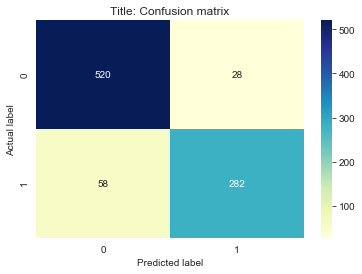

In [11]:
sns.heatmap(pd.DataFrame(confusion_matrix(y,y_pred_rf)), 
            annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Title: Confusion matrix')

print('Accuracy Score: ', metrics.accuracy_score(y, y_pred_rf))

from sklearn.metrics import log_loss
print("Probablity of prediction to be 1 or Yes: ", round(log_loss(y, y_pred_rf)))
print("")

In [12]:
print(classification_report(y,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       548
         1.0       0.91      0.83      0.87       340

   micro avg       0.90      0.90      0.90       888
   macro avg       0.90      0.89      0.90       888
weighted avg       0.90      0.90      0.90       888



In [13]:
from sklearn.metrics import f1_score
f1_score(y, y_pred_rf, average='weighted') 

0.9022083704144095

In [14]:
print('Accuracy Score: ', metrics.accuracy_score(y, y_pred_rf))

('Accuracy Score: ', 0.9031531531531531)


In [15]:
test_df = pd.read_csv('test_modified.csv',index_col='PassengerId')
X_test = test_df[list_of_features]


In [16]:
y_pred_test_rf = gsRFC.predict(X_test)

In [17]:
test_df['Survived'] = y_pred_test_rf.astype(int)

In [18]:
submissions = test_df['Survived']
submissions.columns = ['PassengerId','Survived']
submissions.to_csv("submission_titanic_rf.csv", header=True)

# SVM

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X, y) 
yhat_svm = clf.predict(X)
yhat_svm [0:5]

array([0., 1., 1., 1., 0.])

In [20]:
#from sklearn.metrics import roc_auc_score
#r_a_score = roc_auc_score(y,  clf.predict_proba(X)[:,1])
#print("ROC-AUC-Score:", r_a_score)

('Accuracy Score: ', 0.8243243243243243)
('Probablity of prediction to be 1 or Yes: ', 6.0)



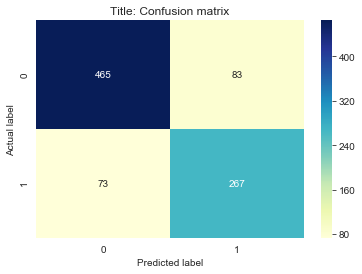

In [21]:
sns.heatmap(pd.DataFrame(confusion_matrix(y,yhat_svm)), 
            annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Title: Confusion matrix')

print('Accuracy Score: ', metrics.accuracy_score(y, yhat_svm))

from sklearn.metrics import log_loss
print("Probablity of prediction to be 1 or Yes: ", round(log_loss(y, yhat_svm)))
print("")

In [22]:
print(classification_report(y,yhat_svm))


              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       548
         1.0       0.76      0.79      0.77       340

   micro avg       0.82      0.82      0.82       888
   macro avg       0.81      0.82      0.82       888
weighted avg       0.83      0.82      0.82       888



In [23]:
from sklearn.metrics import f1_score
f1_score(y, yhat_svm, average='weighted') 

0.8247885165973085

In [24]:
print('Accuracy Score: ', metrics.accuracy_score(y, yhat_svm))

('Accuracy Score: ', 0.8243243243243243)


In [25]:
test_df = pd.read_csv('test_modified.csv',index_col='PassengerId')
X_test = test_df[list_of_features]

In [26]:
y_pred_test_svm = clf.predict(X_test)

In [27]:
test_df['Survived'] = y_pred_test_svm.astype(int)

In [28]:
submissions = test_df['Survived']
submissions.columns = ['PassengerId','Survived']
submissions.to_csv("submission_titanic_svm.csv", header=True)

In [6]:
## Model Accuracy - Features P Values and Confidence Intervals
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.416576
         Iterations 7
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.374     
Dependent Variable:     Survived            AIC:                 775.8396  
Date:                   2019-01-04 15:30    BIC:                 862.0411  
No. Observations:       888                 Log-Likelihood:      -369.92   
Df Model:               17                  LL-Null:             -590.93   
Df Residuals:           870                 LLR p-value:         2.9428e-83
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Fare             